# Import Library

In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, TimeDistributed, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import os, shutil
import zipfile
import random
from random import sample
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

In [ ]:
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Data Loading

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !kaggle datasets download grassknoted/asl-alphabet

In [ ]:
# !unzip asl-alphabet.zip

In [ ]:
# import shutil

# shutil.move('/content/asl_alphabet_train/asl_alphabet_train', '/content/drive/MyDrive/Capstone/Dataset/')

In [ ]:
# shutil.move('/content/asl_alphabet_test/asl_alphabet_test', '/content/drive/MyDrive/Capstone/Dataset/')

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Path awal
# source_dir = '/content/SIBI'
# target_dir = '/content/SIBI Split'
# classes = os.listdir(source_dir)

# # Rasio split
# test_ratio = 0.2

# for class_name in classes:
#     class_path = os.path.join(source_dir, class_name)
#     images = os.listdir(class_path)

#     train_imgs, test_imgs = train_test_split(images, test_size=test_ratio, random_state=42)

#     # Buat folder tujuan jika belum ada
#     for split in ['train', 'test']:
#         split_class_dir = os.path.join(target_dir, split, class_name)
#         os.makedirs(split_class_dir, exist_ok=True)

#     # Salin file ke folder train/test
#     for img in train_imgs:
#         shutil.copy(os.path.join(class_path, img), os.path.join(target_dir, 'train', class_name, img))
#     for img in test_imgs:
#         shutil.copy(os.path.join(class_path, img), os.path.join(target_dir, 'test', class_name, img))

In [ ]:
# # Path dataset
# path = "/content/SIBI"

# # Buat kamus untuk simpan nama file per kelas
# alphabet_image = {}
# class_names = sorted(os.listdir(path))

# # Bangun kamus kelas -> daftar nama file gambar
# for class_name in class_names:
#     class_path = os.path.join(path, class_name)
#     if os.path.isdir(class_path):
#         image_list = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
#         alphabet_image[class_name] = image_list

# # Buat plot
# fig, axs = plt.subplots(len(class_names), 5, figsize=(15, len(class_names) * 2))

# for i, class_name in enumerate(class_names):
#     image_list = alphabet_image[class_name]
#     selected_images = np.random.choice(image_list, 5, replace=len(image_list) < 5)

#     for j in range(5):
#         img_path = os.path.join(path, class_name, selected_images[j])
#         img = Image.open(img_path).convert("RGB")
#         axs[i, j].imshow(img)
#         axs[i, j].set_title(class_name)
#         axs[i, j].axis("off")

# fig.tight_layout()
# plt.show()

In [ ]:
# # Definisikan path sumber
# alphabet_path = "/content/SIBI"

# # Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
# file_name = []
# labels = []
# full_path = []

# # Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
# for path, subdirs, files in os.walk(alphabet_path):
#     for name in files:
#         full_path.append(os.path.join(path, name))
#         labels.append(path.split('/')[-1])
#         file_name.append(name)

# distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# # Plot distribusi gambar di setiap kelas
# Label = distribution_train['labels']
# plt.figure(figsize = (6,6))
# sns.set_style("darkgrid")
# plot_data = sns.countplot(Label)

# Building Model

In [ ]:
train_dir = '/content/drive/MyDrive/Capstone/Dataset/train'

In [ ]:
for x in os.listdir(train_dir):
  print(x, len(os.listdir('/'.join([train_dir,x]))))

B 675
H 675
D 605
G 675
E 675
del 675
A 675
C 675
blank 676
F 675
J 675
L 675
N 675
M 675
P 675
K 675
R 648
O 675
Q 675
I 675
T 675
space 675
W 675
S 675
U 675
V 675
X 675
Y 675
Z 675


In [ ]:
labels =['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','blank','del','space']

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)  # MobileNet input size

datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values (0-255 → 0-1)
    rotation_range=20,        # Randomly rotate images by ±20 degrees
    width_shift_range=0.2,    # Random horizontal shift (up to 20% of width)
    height_shift_range=0.2,   # Random vertical shift (up to 20% of height)
    brightness_range=[0.8, 1.2],  # Adjust brightness randomly (80%-120%)
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Random zoom (±20%)
    validation_split=0.2      # Splitting dataset (80% train, 20% validation)
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',  # Training subset
    class_mode='categorical'  # Multi-class classification
)

# Validation data loader (20% of data)
valid_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',  # Validation subset
    class_mode='categorical'
)

Found 15584 images belonging to 29 classes.
Found 3895 images belonging to 29 classes.


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

IMG_SHAPE = IMAGE_SIZE + (3,)

base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.trainable = False

for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-20:]:
    layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Reduced dense size
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Reduced dense size
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627,677 (10.02 MB)

 Trainable params: 1,573,213 (6.00 MB)

 Non-trainable params: 1,054,464 (4.02 MB)

None


In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(
    train_generator,
    validation_data=valid_data,
    epochs=20,
    callbacks=[early_stopper, reduce_lr, checkpoint],
)

Epoch 1/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.5494 - loss: 7.4510 
Epoch 1: val_loss improved from inf to 5.09447, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 8583s 18s/step - accuracy: 0.5498 - loss: 7.4486 - val_accuracy: 0.9112 - val_loss: 5.0945 - learning_rate: 1.0000e-04
Epoch 2/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.9768 - loss: 4.5359
Epoch 2: val_loss improved from 5.09447 to 3.37988, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 318s 653ms/step - accuracy: 0.9769 - loss: 4.5351 - val_accuracy: 0.9859 - val_loss: 3.3799 - learning_rate: 1.0000e-04
Epoch 3/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.9918 - loss: 3.0478
Epoch 3: val_loss improved from 3.37988 to 2.09358, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 319s 656ms/step - accuracy: 0.9918 - loss: 3.0471 - val_accuracy: 0.9949 - val_loss: 2.0936 - learning_rate: 1.0000e-04
Epoch 4/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9956 - loss: 1.8629
Epoch 4: val_loss improved from 2.09358 to 1.20350, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 312s 641ms/step - accuracy: 0.9956 - loss: 1.8625 - val_accuracy: 0.9967 - val_loss: 1.2035 - learning_rate: 1.0000e-04
Epoch 5/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9978 - loss: 1.0696
Epoch 5: val_loss improved from 1.20350 to 0.67565, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 314s 646ms/step - accuracy: 0.9978 - loss: 1.0694 - val_accuracy: 0.9972 - val_loss: 0.6756 - learning_rate: 1.0000e-04
Epoch 6/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9986 - loss: 0.6091
Epoch 6: val_loss improved from 0.67565 to 0.39584, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 340s 683ms/step - accuracy: 0.9986 - loss: 0.6090 - val_accuracy: 0.9959 - val_loss: 0.3958 - learning_rate: 1.0000e-04
Epoch 7/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.9990 - loss: 0.3698
Epoch 7: val_loss improved from 0.39584 to 0.25969, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 313s 644ms/step - accuracy: 0.9990 - loss: 0.3697 - val_accuracy: 0.9956 - val_loss: 0.2597 - learning_rate: 1.0000e-04
Epoch 8/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.9988 - loss: 0.2495
Epoch 8: val_loss improved from 0.25969 to 0.18879, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 315s 646ms/step - accuracy: 0.9988 - loss: 0.2495 - val_accuracy: 0.9969 - val_loss: 0.1888 - learning_rate: 1.0000e-04
Epoch 9/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9991 - loss: 0.1893
Epoch 9: val_loss improved from 0.18879 to 0.15275, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 330s 663ms/step - accuracy: 0.9991 - loss: 0.1893 - val_accuracy: 0.9969 - val_loss: 0.1528 - learning_rate: 1.0000e-04
Epoch 10/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.9991 - loss: 0.1572
Epoch 10: val_loss improved from 0.15275 to 0.13986, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 314s 644ms/step - accuracy: 0.9991 - loss: 0.1572 - val_accuracy: 0.9946 - val_loss: 0.1399 - learning_rate: 1.0000e-04
Epoch 11/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9994 - loss: 0.1394
Epoch 11: val_loss improved from 0.13986 to 0.12137, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 314s 644ms/step - accuracy: 0.9994 - loss: 0.1394 - val_accuracy: 0.9967 - val_loss: 0.1214 - learning_rate: 1.0000e-04
Epoch 12/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.9995 - loss: 0.1249
Epoch 12: val_loss improved from 0.12137 to 0.11209, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 310s 638ms/step - accuracy: 0.9995 - loss: 0.1249 - val_accuracy: 0.9964 - val_loss: 0.1121 - learning_rate: 1.0000e-04
Epoch 13/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.9986 - loss: 0.1173
Epoch 13: val_loss improved from 0.11209 to 0.10902, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 333s 683ms/step - accuracy: 0.9986 - loss: 0.1173 - val_accuracy: 0.9961 - val_loss: 0.1090 - learning_rate: 1.0000e-04
Epoch 14/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9996 - loss: 0.1061
Epoch 14: val_loss improved from 0.10902 to 0.09514, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 313s 643ms/step - accuracy: 0.9996 - loss: 0.1061 - val_accuracy: 0.9972 - val_loss: 0.0951 - learning_rate: 1.0000e-04
Epoch 15/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9999 - loss: 0.0967
Epoch 15: val_loss did not improve from 0.09514
487/487 ━━━━━━━━━━━━━━━━━━━━ 315s 648ms/step - accuracy: 0.9999 - loss: 0.0967 - val_accuracy: 0.9908 - val_loss: 0.1114 - learning_rate: 1.0000e-04
Epoch 16/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 1.0000 - loss: 0.0896
Epoch 16: val_loss did not improve from 0.09514
487/487 ━━━━━━━━━━━━━━━━━━━━ 315s 646ms/step - accuracy: 1.0000 - loss: 0.0896 - val_accuracy: 0.9941 - val_loss: 0.0974 - learning_rate: 1.0000e-04
Epoch 17/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.9994 - loss: 0.0879
Epoch 17: val_loss improved from 0.09514 to 0.08956, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 313s 643ms/step - accuracy: 0.9994 - loss: 0.0879 - val_accuracy: 0.9946 - val_loss: 0.0896 - learning_rate: 1.0000e-04
Epoch 18/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9998 - loss: 0.0783
Epoch 18: val_loss improved from 0.08956 to 0.07824, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 314s 644ms/step - accuracy: 0.9998 - loss: 0.0783 - val_accuracy: 0.9967 - val_loss: 0.0782 - learning_rate: 1.0000e-04
Epoch 19/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 1.0000 - loss: 0.0731
Epoch 19: val_loss improved from 0.07824 to 0.07291, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 316s 650ms/step - accuracy: 1.0000 - loss: 0.0731 - val_accuracy: 0.9961 - val_loss: 0.0729 - learning_rate: 1.0000e-04
Epoch 20/20
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9995 - loss: 0.0709
Epoch 20: val_loss improved from 0.07291 to 0.07053, saving model to /content/drive/MyDrive/Capstone/28-5-25/mobilenet_best_model.h5


487/487 ━━━━━━━━━━━━━━━━━━━━ 314s 644ms/step - accuracy: 0.9995 - loss: 0.0709 - val_accuracy: 0.9969 - val_loss: 0.0705 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 20.


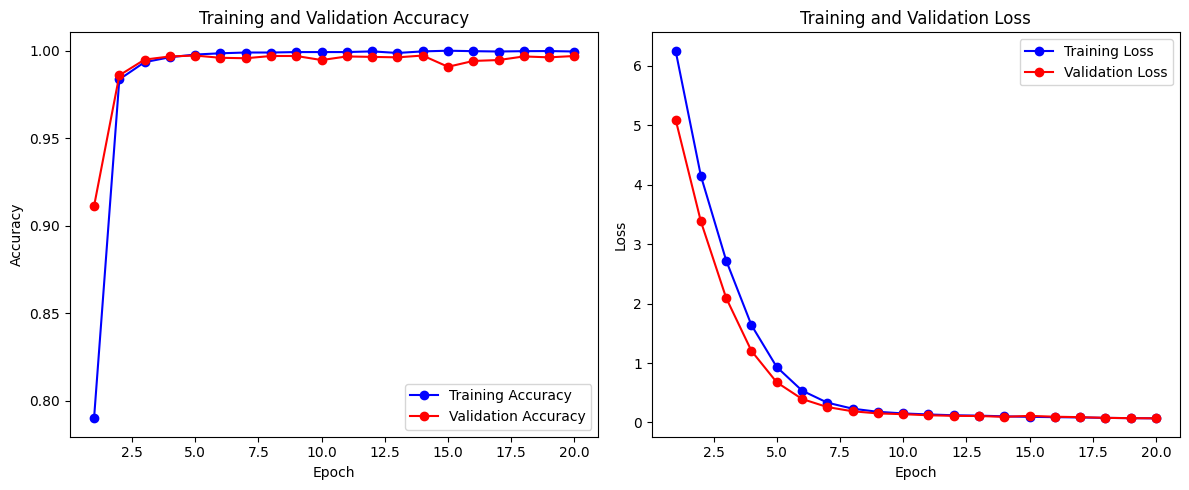

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Grafik Akurasi
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Grafik Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan grafik
plot_training_history(history)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Pastikan valid_data tidak di-shuffle agar urutan prediksi dan label cocok
valid_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    shuffle=False  # Penting!
)

# 2. Prediksi seluruh validasi dataset
y_pred_prob = model.predict(valid_data, verbose=1)
y_pred = np.argmax(y_pred_prob, axis=1)

# 3. Ambil label asli
y_true = valid_data.classes  # array of true labels

# 4. Ambil nama kelas
class_labels = list(valid_data.class_indices.keys())

# 5. Cetak classification report
from sklearn.metrics import classification_report

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_true, y_pred, target_names=class_labels))


Found 3895 images belonging to 29 classes.
122/122 ━━━━━━━━━━━━━━━━━━━━ 69s 537ms/step

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       135
           B       1.00      1.00      1.00       135
           C       1.00      1.00      1.00       135
           D       1.00      0.99      1.00       121
           E       1.00      0.99      1.00       135
           F       1.00      1.00      1.00       135
           G       0.99      1.00      1.00       135
           H       1.00      1.00      1.00       135
           I       1.00      1.00      1.00       135
           J       1.00      0.99      1.00       135
           K       1.00      1.00      1.00       135
           L       1.00      1.00      1.00       135
           M       0.99      1.00      1.00       135
           N       0.96      0.99      0.97       135
           O       1.00      1.00      1.00       135
           P     